In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.optimize as spo

print('tensorflow version: %s' % tf.__version__)
print('pandas version: %s' % pd.__version__)
print('numpy version: %s' % np.__version__)

tensorflow version: 1.1.0-rc0
pandas version: 0.19.2
numpy version: 1.12.1


### Return CSV file path given ticker symbol. 

In [2]:
def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

### Read stock data (adjusted close) for given symbols from CSV files.

In [3]:
def get_data(symbols, dates):
    # Create an empty dateframe
    df = pd.DataFrame(index=dates)

    if 'TPE-TSEC' not in symbols:
        symbols.insert(0, 'TPE-TSEC')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),
                              index_col='Date',
                              parse_dates=True,
                              usecols=['Date', 'Adj Close'],
                              na_values=['nan'])

        # Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        # Join two dataframes using DataFrame.join()
        # if the value of the 'how' argument is assigned, then we don't use dropna()
        # because it does the same thing
        # Two ways to get the data frame
        # [1] data intersection
        df = df.join(df_temp)
        if symbol == 'TPE-TSEC':
            df = df.dropna(subset=["TPE-TSEC"])
        # [2] data intersection
        # df = df.join(df_temp, how='inner')  # use default how='left', use how='inner' to join by intersection
    print(np.shape(df))
    return df

### Read the csv and get the dataframe

In [16]:
# read the entire dataframe
df_TSEC = pd.read_csv(symbol_to_path('TPE-TSEC'))

In [22]:
print(df_TSEC.head())

         Date         Open         High          Low        Close   Volume  \
0  2017-03-17  9845.589844  9908.690430  9835.509766  9908.690430  2689700   
1  2017-03-16  9768.849609  9842.169922  9768.849609  9837.830078  2102200   
2  2017-03-15  9741.290039  9749.009766  9714.580078  9740.309570  1836600   
3  2017-03-14  9720.530273  9767.660156  9720.530273  9744.209961  2212800   
4  2017-03-13  9656.559570  9697.339844  9656.559570  9697.339844  1858800   

     Adj Close  
0  9908.690430  
1  9837.830078  
2  9740.309570  
3  9744.209961  
4  9697.339844  


In [23]:
print(df_TSEC.tail())

            Date         Open         High          Low        Close  Volume  \
4244  2000-01-10  8941.929688  9126.019531  8891.790039  9102.599609       0   
4245  2000-01-07  8853.429688  8940.769531  8739.429688  8849.870117       0   
4246  2000-01-06  8900.559570  9023.990234  8833.910156  8922.030273       0   
4247  2000-01-05  8690.599609  8867.679688  8668.019531  8849.870117       0   
4248  2000-01-04  8644.910156  8803.610352  8642.500000  8756.549805       0   

        Adj Close  
4244  9102.566513  
4245  8849.837940  
4246  8921.997834  
4247  8849.837940  
4248  8756.517967  


In [24]:
print(df_TSEC[4000:4003])

            Date         Open         High          Low        Close  Volume  \
4000  2001-01-04  5028.319824  5169.129883  5028.319824  5136.129883       0   
4001  2001-01-03  4843.540039  4970.450195  4831.120117  4894.790039       0   
4002  2001-01-02  4717.490234  4945.089844  4678.000000  4935.279785       0   

        Adj Close  
4000  5136.111208  
4001  4894.772242  
4002  4935.261841  


In [27]:
print('max: %f'% df_TSEC['Close'].max())
print('mean: %f'% df_TSEC['Close'].mean())
print('min: %f'% df_TSEC['Close'].min())

max: 10202.200195
mean: 7231.826414
min: 3446.260010


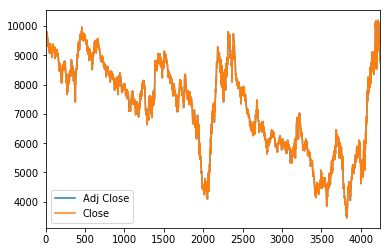

In [29]:
df_TSEC[['Adj Close','Close']].plot()
plt.show()

------
## <font color=red>Main dataframe</font> sliced with given date range for the following examples

In [4]:
# Define date range
#start_date = '2009-06-01'
#end_date = '2012-09-30'
start_date = "2005-12-31"
end_date = "2012-09-12"
dates = pd.date_range(start_date, end_date)
symbols = ['2002-CSC', '2330-TSMC', '2498-HTC', 'FAKE1', 'FAKE2']
df_main = get_data(symbols, dates)
# print(df)

(1655, 6)


### Row range
Slice by row range (dates) using DataFrame.ix[] selector

In [48]:
print(df_main.ix['2010-03-01':'2010-03-05'])

               TPE-TSEC  2002-CSC  2330-TSMC  2498-HTC  FAKE1  FAKE2
2010-03-01  7577.722448  22.69878    46.9751  238.7944  59.22  26.05
2010-03-02  7597.592493  22.76801    47.2116  242.4680  59.74  26.09
2010-03-03  7629.492279  22.90639    47.2904  237.6919  59.28  26.06
2010-03-04  7569.772282  22.56033    46.6599  235.1199  59.71  26.16
2010-03-05  7666.231892  22.90639    47.6057  236.9571  61.69  26.95


In [55]:
# First row of dataframe
print(df_main.ix[0])

TPE-TSEC     6954.074813
2002-CSC       18.117080
2330-TSMC      43.770900
2498-HTC      375.771100
FAKE1          43.780000
FAKE2          27.040000
Name: 2009-06-01 00:00:00, dtype: float64


### Column range

In [35]:
print(df_main[['TPE-TSEC', '2330-TSMC']])

### Row and column range

In [50]:
print(df_main.ix['2012-01-01':'2012-01-05', ['TPE-TSEC', '2330-TSMC']])

               TPE-TSEC  2330-TSMC
2012-01-02  6952.184684    59.7231
2012-01-03  7053.354238    60.3220
2012-01-04  7082.944462    60.3220
2012-01-05  7130.833936    65.0280


### Normalize stock prices using the first row of the dataframe.
Divide the entire data by the first row to be equal footing

**1. Implicit way: **
```
df = df / df.ix[0]
```
**2. Explicit way **
```
df = df / df.ix[0, :]
```

In [5]:
def normalize_data(df):
    return df / df.ix[0, :]

### Plot stock prices with a custom title and meaningful axis labels.

In [6]:
def set_plot_data(df, normalize=False, title="Stock prices", xlabel="Date", ylabel="Price"):
    df_temp = df.copy()
    if normalize:
        df_temp = normalize_data(df_temp)
    ax = df_temp.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

### Subplot with pandas - https://goo.gl/kVAUF2
setup subplots before calling this method:
```
fig, axes = plt.subplots(nrows=1, ncols=1)
```

In [7]:
def set_subplot_data(df, axes=None, ncols=1, row_idx=0, col_idx=0, title="Stock prices", xlabel="Date", ylabel="Price"):
    if ncols <= 1:
        ax = df.plot(ax=axes[row_idx], title=title, fontsize=12)
    else:
        ax = df.plot(ax=axes[row_idx, col_idx], title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

### Get the desired columns over index values in the given range.

In [8]:
def get_selected(df, start_index, end_index, columns):
    return df.ix[start_index:end_index, columns]

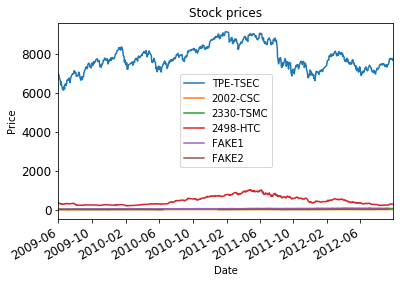

In [15]:
# define subplots for df_main and plot it
set_plot_data(df_main, title='Stock prices')
plt.show()

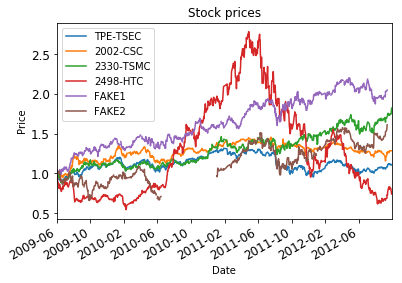

In [23]:
# Normalize data and plot
set_plot_data(df_main, normalize=True, title='Stock prices')
plt.show()

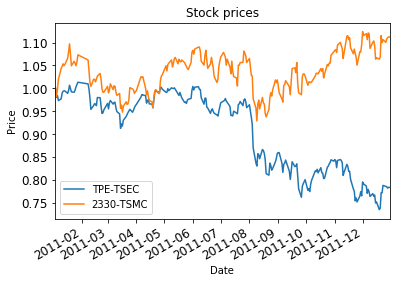

In [9]:
# Slice and plot
df_selected = get_selected(df_main, '2011-01-01', '2011-12-31', ['TPE-TSEC', '2330-TSMC'])
set_plot_data(df_selected, normalize=True, title='Stock prices')
plt.show()

### <font color=blue>Bollinger Bands</font>

In [9]:
def get_rolling_mean(values, window):
    return pd.Series.rolling(values, window=window).mean()

In [10]:
def get_rolling_std(values, window):
    return pd.Series.rolling(values, window=window).std()

In [11]:
def get_bollinger_bands(rm, rstd):
    upper_band = rm + rstd * 2
    lower_band = rm - rstd * 2
    return upper_band, lower_band

In [12]:
def compute_bollinger_bands(df):
    ax = df.plot(title='TSEC rolling mean', label='TSEC')

    # 1. Compute rolling mean
    rm_TSEC = get_rolling_mean(df, window=20)

    # 2. Compute rolling standard deviation
    rstd_TSEC = get_rolling_std(df, window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_TSEC, rstd_TSEC)

    rm_TSEC.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='upper left')
    plt.show()

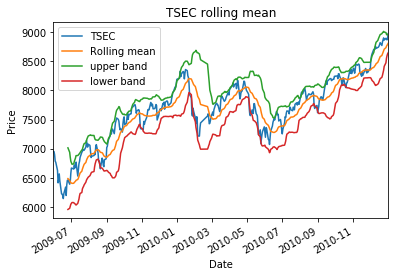

In [16]:
# Compute rolling mean using pd.Series
# http://pandas.pydata.org/pandas-docs/stable/computation.html
df_selected = get_selected(df_main, '2009-06-01', '2010-12-31', 'TPE-TSEC')
compute_bollinger_bands(df_selected)

### <font color=blue>Daily returns</font>
```daily_returns[t] = (price[t] - price[t-1]) - 1```

**.values** attribute: given two dataframes, Pandas will try to match each row based on index when performing element wise arithmetic operations.
So effort in shifting the values by one will be lost if we do not use .values attribute.

In [13]:
def compute_daily_returns(df, use_pandas=True):
    if not use_pandas:
        # Note: Returned DataFrame must have the same number of rows
        daily_returns = df.copy() # copy given DataFrame to match size and column names
        # Compute daily returns for row 1 onwards
        # df[1:] picks all the rows from 1 till the end
        # df[:-1] picks all the row from 0 till 1 less than the end
        daily_returns[1:] = (df[1:] / df[:-1].values) - 1
        daily_returns.ix[0, :] = 0  # set daily returns for row 0 to 0
    else:
        daily_returns = (df / df.shift(1)) - 1
    return daily_returns

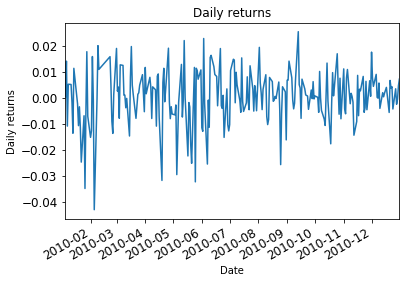

In [44]:
daily_returns = compute_daily_returns(df_selected)
set_plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
plt.show()

### <font color=blue>Cumulative returns</font>
```cumulative_returns[t] = (price[t] - price[0]) - 1```

In [14]:
def compute_cumulative_returns(df, begin_date, end_date):
    print(len(df_selected.shape))
    if len(df) > 1:
        cumulative_returns = (df.ix[begin_date:end_date, :] / df.ix[0]) - 1
    else:
        cumulative_returns = (df.ix[begin_date:end_date] / df.ix[0]) - 1
    return cumulative_returns

2


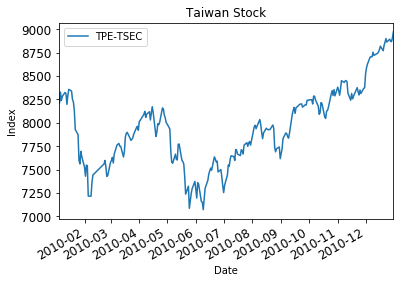

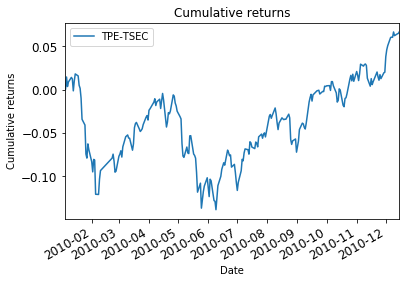

In [17]:
# define subplots
# fig, axes = plt.subplots(nrows=2, ncols=1)
df_selected = get_selected(df_main, '2010-01-01', '2010-12-31', ['TPE-TSEC'])
set_plot_data(df_selected, title='Taiwan Stock', ylabel='Index')
# compute cumulative returns
cumulative_returns = compute_cumulative_returns(df_selected, '2010-01-01', '2010-12-15')
set_plot_data(cumulative_returns, title="Cumulative returns", ylabel='Cumulative returns')
plt.show()

### <font color=blue>Fill missing values</font>
Fill missing values in data frame, in place

(1655, 6)


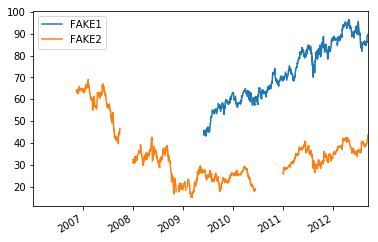

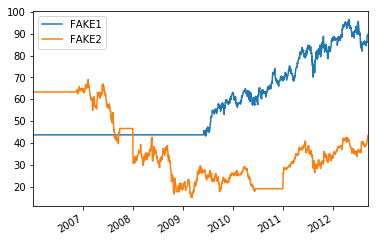

In [27]:
print(df_main.shape)
df_fake = df_main.ix[:, ['FAKE1', 'FAKE2']]
df_fake.plot()
df_fake.fillna(method='ffill', inplace=True)
df_fake.fillna(method='bfill', inplace=True)
df_fake.plot()
plt.show()

### <font color=blue>Histograms</font>

('mean: ', TPE-TSEC    0.000639
dtype: float64)
('std: ', TPE-TSEC    0.013347
dtype: float64)


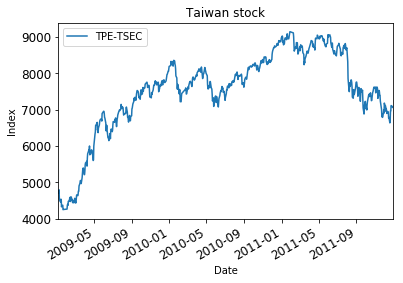

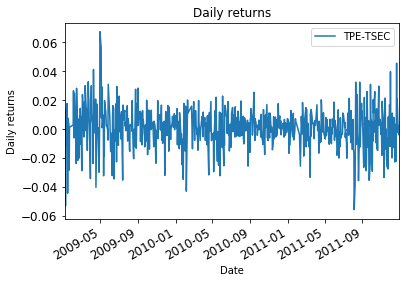

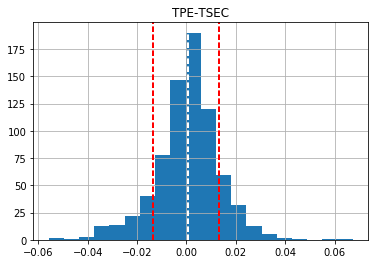

In [15]:
df_selected = get_selected(df_main, '2009-01-01', '2011-12-31', ['TPE-TSEC'])
set_plot_data(df_selected, title="Taiwan stock", ylabel="Index")
# Compute daily returns
daily_returns = compute_daily_returns(df_selected)
set_plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
daily_returns.hist(bins=20)

mean = daily_returns.mean()
std = daily_returns.std()
print('mean: ', mean)
print('std: ', std)
plt.axvline(mean.item(), color='w', linestyle='dashed', linewidth=2)
plt.axvline(std.item(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std.item(), color='r', linestyle='dashed', linewidth=2)
plt.show()

### Compare two histograms

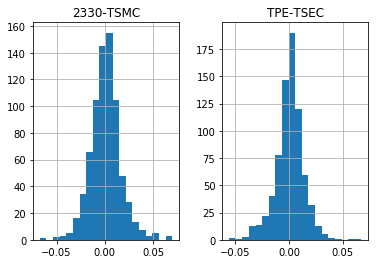

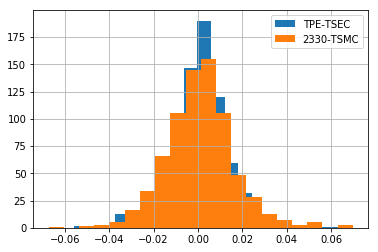

In [24]:
df_selected = get_selected(df_main, '2009-01-01', '2011-12-31', ['TPE-TSEC', '2330-TSMC'])
# Compute daily returns
daily_returns = compute_daily_returns(df_selected)
daily_returns.hist(bins=20)
plt.show()
daily_returns['TPE-TSEC'].hist(bins=20, label='TPE-TSEC')
daily_returns['2330-TSMC'].hist(bins=20, label='2330-TSMC')
plt.legend(loc='upper right')
plt.show()

### <font color=blue>Scatterplots</font>
[Linear equation](https://en.wikipedia.org/wiki/Linear_equation) - 
**Slope–intercept form**

$ y=mx+b $

where m is the slope of the line and b is the y intercept, which is the y coordinate of the location where the line crosses the y axis. 

**Reference:**
[numpy.ployfit()](https://docs.scipy.org/doc/numpy-1.9.1/reference/generated/numpy.polyfit.html)

return **polynomial coefficient** and **intercept**

m is the coefficient named as 'beta'

b is the intercept named as 'alpha'

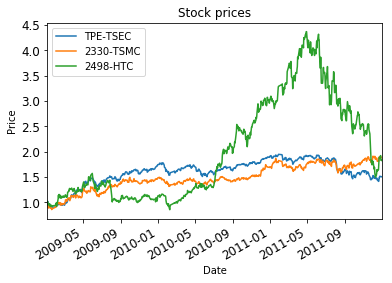

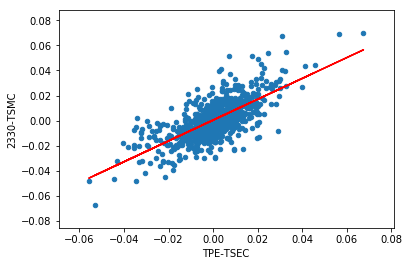

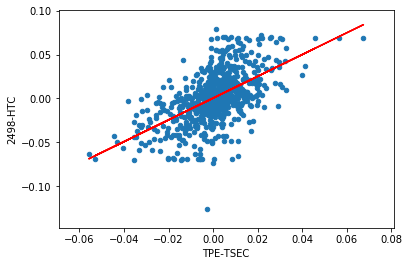

('beta TSMC: ', 0.83094245259398003)
('alpha TSMC: ', 0.00042395319728006297)
('beta HTC: ', 1.241815964663965)
('alpha HTC: ', 0.00042927963451875711)

Correlation coefficient
           TPE-TSEC  2330-TSMC  2498-HTC
TPE-TSEC   1.000000   0.699017  0.567645
2330-TSMC  0.699017   1.000000  0.389814
2498-HTC   0.567645   0.389814  1.000000


In [17]:
df_selected = get_selected(df_main, '2009-01-01', '2011-12-31', ['TPE-TSEC', '2330-TSMC', '2498-HTC'])
set_plot_data(df_selected, normalize=True, title='Stock prices')
plt.show()
# Compute daily returns
daily_returns = compute_daily_returns(df_selected)

# Fill missing values of first day
daily_returns.fillna(method='bfill', inplace=True)

# Plot TPE-TSEC vs. 2330-TSMC
daily_returns.plot(kind='scatter', x='TPE-TSEC', y='2330-TSMC')
# Draw a line which has an equation of degree one, and then fit a polynomial of degree one.
beta_TSMC, alpha_TSMC = np.ma.polyfit(x=daily_returns['TPE-TSEC'], y=daily_returns['2330-TSMC'], deg=1)
# y = mx + b => beta_TSMC * daily_returns + alpha_TSMC,
plt.plot(daily_returns['TPE-TSEC'], beta_TSMC * daily_returns['TPE-TSEC'] + alpha_TSMC, '-', color='r')
plt.show()

# Plot TPE-TSEC vs. 2498-HTC
daily_returns.plot(kind='scatter', x='TPE-TSEC', y='2498-HTC')
beta_HTC, alpha_HTC = np.polyfit(x=daily_returns['TPE-TSEC'], y=daily_returns['2498-HTC'], deg=1)
plt.plot(daily_returns['TPE-TSEC'], beta_HTC * daily_returns['TPE-TSEC'] + alpha_HTC, '-', color='r')
plt.show()

print('beta TSMC: ', beta_TSMC)
print('alpha TSMC: ', alpha_TSMC)
print('beta HTC: ', beta_HTC)
print('alpha HTC: ', alpha_HTC)
print('\nCorrelation coefficient')
print(daily_returns.corr(method='pearson'))

### <font color=blue>Real world use of kurtosis</font>
<font color=red>In many cases in financial research we assume the returns are normally distributed. But this can be dangerous because it ignores kurtosis or the probability in the tails.
<br/><br/>
In the early 2000s investment banks built bonds based on mortgages. They assumed that te distribution of returns for these mortgages was normally distributed. On that basis they were able to show that these bonds had a very low probability of default. 
<br/><br/>
But they made two mistakes. First, they assume that the return of each of these mortgages was independent, and two that this return would be normally distributed. Both of these assumptions proved to be wrong, as massive numbers of homeowners defaulted on their mortgages. It was these defaults that precipitated the great recession of 2008.
</font>

-----
![Daily portfolio values](images/portfolio.png)
(1) start with the prices

(2) normalize the prices divided by the first day, so the first row is all ones.<br/>
``` 
normed = prices / prices[0] 
```

(3) multiply by the allocations, that gives us that in each column, the relative value of each of those aspects over time.<br/>
``` 
alloced = normed * allocs 
```

(4) multiply by initial investment, that causes now each row to be the real value of that investment each day over time, starting with initial allocations.<br/>
``` 
position_values = alloced * start_values 
```

(5) sum each row for total values of portfolio, get the value of the portfolio on each corresponding day.<br/>
``` 
portfolio_values = position_values.sum(axis=1) 
```

-----
![Daily portfolio statistics](images/portfolio_statistics.png)

first value is always zero because first day is no change, we have to exclude it.
```
daily_returns = daily_returns[1:] 
```
(1) measure how much the value of portfolio has gone up from the beginning to the end.
```
cumulative_returns = (portfolio_values[-1] / portfolio_values[0]) - 1
```
(2) average the numbers of daily returns, and take the mean
```
average_daily_returns = daily_returns.mean() 
```
(3) standard deviation
```
std_daily_returns = daily_returns.std()
```
(4) consider our return or our rewards in the context of risk
```
sharpe.ratio
```
![Sharpe ratio](images/sharpe_ratio.png)
1. Both stocks have similar volatility, so ABC is better due greater returns.
2. Here both stocks have similar daily returns, but XYZ has lower volatility (risk).
3. In this case, we actually do not have clear picture of which stock is better!


### <font color=blue>Sharpe ratio</font>
Sharpe ratio is a metric that adjusts return for risk. It enables us in a quantitative way to asses each of these example compared portfolios.

all else being equal
* lower risk is better.   
* higher return is better

Sharpe ratio also considers **risk free rate of return**

$$ \frac{R_p - R_f}{\sigma_p} $$

<font color=blue>$ R_p$</font>: portfolio return<br/>
<font color=blue>$ R_f$</font>: risk free rate of return <br/>
<font color=blue>$ \sigma_p$</font>: standard deviation of portfolio return

The return on portfolio is divided by the volatility <font color=blue>$ \sigma_p $</font>. So as things become more volatile, the ratio goes down.<br/>
We've got return on portfolio on the top <font color=blue>$ R_p $</font>, as return goes up, the metric goes up.<br/>
We subtract the risk free return <font color=blue>$ R_f $</font>, So as risk free return increases, the value of our metric decreases. 
Meaning, essentially we need to have a higher return on our portfolio than the risk free metric in order to have a positive number.

The value of a portfolio is directly proportional to the return it generates over some baseline (here risk-free rate), and inversely proportional to its volatility.

Also notice that this form subtracts like quantities (returns).


### <font color=blue>Computing Sharpe ratio</font>
$$ S = \frac{E[R_p-R_f]}{std[R_p-R_f]} $$<br/>
Expected value of the return on a portfolio <font color=blue>$R_p$</font>, minus the risk free rate of return <font color=blue>$R_f$</font>, divided by the standard deviation of that same difference.<br/>
This is the ex ante formulation, meaning, because we're using expected, it's a forward looking measure of what the Sharpe ratio should be.<br/>
To calculate this in reality, we need to look back at those values.
The expected value of the difference is simply the mean of what that difference was over time.

To calculate this in Python using historical data, take **`the mean of daily returns`** <font color=blue>$DailyReturns$</font> minus **`the daily risk-free rate`** <font color=blue>$DailyR_f$</font>, and divide that by **`the standard deviation of the daily returns`** <font color=blue>$DailyReturns$</font> minus **`the daily risk-free rate`** <font color=blue>$DailyR_f$</font>.

$$ S = \frac{mean[DailyReturns - DailyR_f]}{std[DailyReturns - DailyR_f]} $$<br/>

#### What is this risk free rate?

Traditionally there are a few numbers that people use for this.

1. the London Interbank Offer Rate (LIBOR)
2. the interest rate on the 3-month Treasury bill.
3. 0% (a value that people have been using a lot over the last few years is 0 which is a good approximation to the risk free rate.)

LIBOR changes each day and 3-month T-bill changes a little bit each day.
The risk free rate is not given on a daily basis, for instance, putting your money in a bank account or a certificate of deposit.
Usually that's a percentage on an annual basis or a six month basis. 

How to convert that annual amount into a daily amount?<br/>
Suppose our risk free rate is 10% per year or 0.1, which means if it starts at the beginning of the year with a value of 1.0, at the end of the year we have 1.1, so it would be adding 1 here.

$1.0 + 0.1$

So this is the total value of our asset at the end of the year.<br/>
What is the interest rate per day that would enable us to get to the total value?

It's a number that if we multiple it by itself each day for each day in the trading year, or 252 times, would arrive at the number as below.

$DailyR_f = \sqrt[252]{1.0 + 0.1} -1$

In this standard deviation calculation, we can just remove the constant because a set of values minus a constant, when you calculate the standard deviation, is just as if this were 0.

Summing it all up, this is the equation we typically use for calculating Sharpe ratio using daily returns.
We drop the **`daily risk free rate`** <font color=blue>$DailyR_f$</font> from the standard deviation because we treat that as a <font color=blue>constant</font..
<br/><br/>
$$ S = \frac{mean[DailyReturns - DailyR_f]}{std[DailyReturns]} $$<br/>

If the daily risk free rate <font color=blue>$DailyR_f$</font> is greater than 0, then we need to plug <font color=blue>$DailyR_f$</font> back, but we can usually use a constant there as well.<br/>
<br/>
More of Sharpe ratio<br/>
* SR can very widely depending on how frequently you sample.<br/>
* SR is an annual measure.<br/>
* $SR_{annualized} = K * SR$<br/>
* $K = \sqrt{Samples Per Year}$<br/>
  * $Daily K =$ <font color=blue>$\sqrt{252}$</font><br/>
  * $Weekly K =$ <font color=blue>$\sqrt{52}$</font><br/>
  * $Monthly K =$ <font color=blue>$\sqrt{12}$</font><br/>
  
For example<br/>
$SR =$ <font color=blue>$\sqrt{252}$</font> $* \frac{mean(DailyReturns - DailyR_f)}{std(DailyReturns)}$<br/>

### Quiz: What is the Sharpe ratio?

Given 
* 60 days of data  
* Average daily return = 10 bps(basis point) = 0.001   
* Daily risk free = 2 bps = 0.0002   
* Standard deviation return = 10 bps = 0.001

$SR = \sqrt(252) * \frac{10 - 2}{10} = 12.7 $

### <font color=blue>The key factors most people focus on when evaluating the performance of portfolio</font>
1. Cumulative return 
2. Average daily return 
3. Risk 
4. Sharpe ratio  

----
### <font color=blue>Optimizers: building a parameterized model</font>

An optimizer is an algorithm that can do the following things.  
1. Find minium values of functions.    
2. Build parameterized models based on data.
 * Find the parameters for parameterized models for the data, so we might have some data from the experiment and we can use optimizers to find a polynomial fit to that data.
3. Refine allocations to stocks in portfolios.
 * Decide what percentage of funds should be allocated to each stock using an optimizer. See the steps below.
 
### <font color=blue>How to use an optimizer?</font>
1. Provide a function to minimize   
  * Define a function you want to minimize. For example, define a function as $f(x) = x^2 + 5$. Minimizer will call this function many times to find a value x that causes this function overall to be the smallest.
2. Provide n intial guess 
  * Start with an initial guess for x that you think might be close to the solution to the problem.
  * We can choose a random value or some standard value as an initial guess.
  * Optimizer starts with that guess and repeatedly calls a function, tests different values and narrows in on the solution.
3. Call the optimizer
  * Call the optimizer with the parameters and stand back while it searches for the minimum.


X = [ 2.], Y = [ 0.75]
X = [ 2.], Y = [ 0.75]
X = [ 2.00000001], Y = [ 0.75000001]
X = [ 0.99999999], Y = [ 0.75000001]
X = [ 1.5], Y = [ 0.5]
X = [ 1.5], Y = [ 0.5]
X = [ 1.50000001], Y = [ 0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at:
X = [ 1.5]
Y = 0.5
X = [ 0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5], Y = [ 1.5   1.31  1.14  0.99  0.86  0.75  0.66  0.59  0.54  0.51  0.5   0.51
  0.54  0.59  0.66  0.75  0.86  0.99  1.14  1.31  1.5 ]


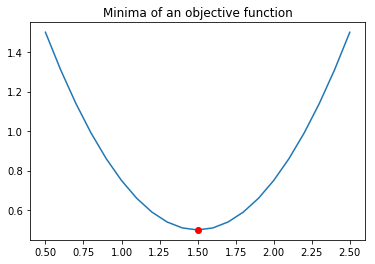

In [8]:
def f(X):
    """Given a scalar X, return some value(a real number)"""
    Y = (X - 1.5)**2 + 0.5
    print('X = {}, Y = {}'.format(X, Y))
    return Y
    
Xguess = 2.0
min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp':True})
print('Minima found at:')
print('X = {}'.format(min_result.x))
print('Y = {}'.format(min_result.fun))

Xplot = np.linspace(0.5, 2.5, 21)
Yplot = f(Xplot)
plt.plot(Xplot, Yplot)
plt.plot(min_result.x, min_result.fun, 'ro')
plt.title('Minima of an objective function')
plt.show()

### <font color=blue>[Convex problems](https://classroom.udacity.com/courses/ud501/lessons/4351588706/concepts/43677793210923#)</font>
[Wikipedia](http://en.wikipedia.org/wiki/Convex_function): "... a real-valued function f(x) defined on an interval is called **`convex`** if the line segment between any two points on the graph of the function lies above the graph ..."

* Choose two points, draw line
* Convex if line is above graph
![Convex problems](images/convex_problems.png)

### <font color=blue>Build a parameterized model</font>
![Parameterized1](images/parameterized_model_1.png)  
![Parameterized2](images/parameterized_model_2.png)
### <font color=blue>What are we minimizing?</font>
![Parameterized3](images/parameterized_model_3.png)
We're trying to discover the quation of a line that best fits those points.  <br/>
Suppose this blue line is a candidate line and we want to evaluate it. It is good or bad?  <br/>
The minimizer will vary <font color=blue>$C_0$</font> and <font color=blue>$C_1$</font> to try and minimize something.  <br/>
We have to come up with an equation that gets lower in value as this line better fits the data. <br/>
Observe how far away the point is from the blue line that we're evaluating. <br/>
Let's call each of distances <font color=blue>$e$</font>, come up with an equation in terms of <font color=blue>$e$</font> or error to get us to the solution

In [2]:
def error(line, data):
    """Compute error between given line model and observed data.
    Parameters
    ----------
    line: tuple/list/array (C0, C1) where C0 is slope and C1 is Y-intercept
    data: 2D array where each row is a point (x, y)

    Returns error as a single real value.
    """
    # Metric: Sum of squared Y-axis differences
    c0 = line[0]
    c1 = line[1]
    x = data[:, 0]
    y = data[:, 1]
    err = np.sum((y - (c0 * x + c1)) ** 2)
    return err


def fit_line(data, error_func):
    """Fit a line to given data, using a supplied error function.

    Parameters
    ----------
    data: 2D array where each row is a point (X0, Y)
    error_func: funciton that computes the error between a line and observed data

    Returns line that minimizes the error function.
    """
    # Generate initial guess for line model
    line = np.float32([0, np.mean(data[:, 1])]) # slope = 0, intercept = mean(y values)

    # Plot initial guess (optional)
    x_ends = np.float32([-5, 5])
    plt.plot(x_ends, line[0] * x_ends + line[1], 'm--', linewidth=2.0, label='Initial guess')

    # Call optimizer to minimize error function
    # args: pass the data as argument to error_func
    result = spo.minimize(error_func, line, args=(data,), method='SLSQP', options={'disp':True})
    return result.x

def error_poly(C, data):
    """Compute error between given polynomial and observed data.

    Parameters
    ----------
    C(Coefficients for the polynomial): numpy.poly1d object or equivalent array representing polynomial coefficients
    data: 2D array where each row is a point (x, y)

    Returns error as a single real value.
    """
    # Metric: Sum of squared Y-axis differences
    # np.polyval(): Evaluate a polynomial at specific values.
    # for example, np.polyval([3,0,1], 5) ==> 3 * 5**2 + 0 * 5**1 + 1 ==> 76
    x = data[:, 0]
    y = data[:, 1]
    err = np.sum((y - np.polyval(C, x)) ** 2)
    return err

def fit_poly(data, error_func, degree=4):
    """Fit a polynomial to given data, using supplied error function.
    
    Parameters
    ----------
    data: 2D array where each row is a point (x, y)
    error_func: function that computes the error between a polynomial and observed difference

    Returns polynomial that minimizes the error funciton.
    """
    # Generate initial guess for polynomial model (all coeffs = 1)
    # for example, np.poly1d([1, 2, 3]) ==> 1x**2 + 2x + 3
    Cguess = np.poly1d(np.ones(degree + 1, dtype=np.float32))

    # Plot initial guess (optional)
    x = np.linspace(-5, 5, 21)
    plt.plot(x, np.polyval(Cguess, x), 'm--', linewidth=2.0, label='Initial guess')

    # Call optimizer to minimize error function
    # Sequential Least SQuares Programming (SLSQP).
    result = spo.minimize(error_func, Cguess, args=(data,), method='SLSQP', options={'disp':True})
    # for example, np.poly1d([1, 2, 3]) ==> 1x**2 + 2x + 3
    return np.poly1d(result.x) # convert optimal result into a poly1d object and return the result

Original line: C0 = 4.0, C1 = 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 121.378719941
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
Fitted line: C0 = 3.59955971105, C1 = 2.96231787632


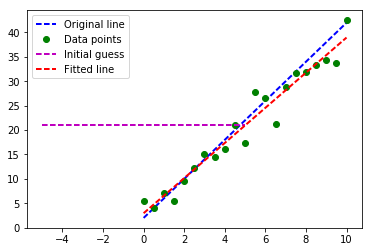

In [3]:
# Define original ine
l_orig = np.float32([4, 2])
c0, c1 = l_orig[0], l_orig[1]
print('Original line: C0 = {}, C1 = {}'.format(c0, c1))
# Xorig = [0., 0.5, 1., ..., 10.]
Xorig = np.linspace(0, 10, 21)
# Yorig = [2., 4., 6., ..., 42.]
Yorig = c0 * Xorig + c1
plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label='Original line')

# Generate noisy data points
noise_sigma = 3.0
# Draw random samples from a normal (Gaussian) distribution.
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
x, y = data[:, 0], data[:, 1]
plt.plot(x, y, 'go', label='Data points')

# Try to fit a line to this data
l_fit = fit_line(data, error)
fit_c0, fit_c1 = l_fit[0], l_fit[1]
print('Fitted line: C0 = {}, C1 = {}'.format(fit_c0, fit_c1))
plt.plot(x, fit_c0 * x + fit_c1, 'r--', linewidth=2.0, label='Fitted line')

# Add a legend and show plot
plt.legend(loc='upper left')
plt.show()

     4      3     2
1.5 x - 10 x - 5 x + 60 x + 50
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 127.24169198
            Iterations: 8
            Function evaluations: 74
            Gradient evaluations: 8
       4         3         2
1.508 x - 9.979 x - 5.095 x + 59.34 x + 49.43


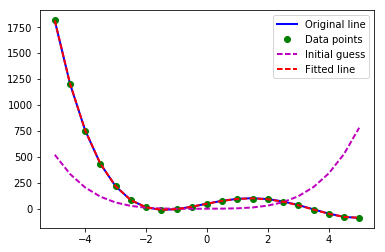

In [6]:
# Fitting Higher Order Polynomials
Cguess = np.poly1d([1.5, -10, -5, 60, 50])
print(Cguess)
Xorig = np.linspace(-5, 5, 21)
Yorig = np.polyval(Cguess, Xorig)
plt.plot(Xorig, Yorig, 'b', linewidth=2.0, label='Original line')

# Generate noisy data points
noise_sigma = 3.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
x, y = data[:, 0], data[:, 1]
plt.plot(x, y, 'go', label='Data points')

# Try to fit a line to this data
fit_coef = fit_poly(data, error_poly)
print(fit_coef)
plt.plot(x, np.polyval(fit_coef, x), 'r--', linewidth=2.0, label='Fitted line')

# Add a legend and show plot
plt.legend(loc='upper right')
plt.show()

### <font color=blue>Optimizers: How to optimize a portfolio?</font>
**`What is application portfolio optimization? `**<br/>
Given a set of assets and a time period, find an allocation of funds to assets that maximizes performance.

**`What is performance?`**<br/>
We could choose from a number of metrics, including cumulative return, volatility or risk, and risk adjusted return, which is Sharpe ratio.

**`Framing the problems`**<br/>
* Provide a function to minimize     
  * <font color=blue>$f(x)$</font> where <font color=blue>$x$</font> are the allocations that we're looking for. It can be multiple dimensions, each dimension of x here is an allocation to each of the stocks.
  * Let the optimizer try different allocations in order to discover the best set of allocations that optimizes this function.
  * Try to find the largest Sharpe ratio multiplying by a negative 1 using optimizer.
  * Becomes <font color=blue>$f(x) = SharpeRatio * -1$</font>
* Provide an initial guess for <font color=blue>$x$</font>
* Call the optimizer

**`Ranges and constraints`**
One of them will help your optimization run faster.

1. Tell the optimizer that it should only look at certain ranges for X.
 * In other words, for this problem, for each of the various allocations, it's only worth looking at values between 0 and 1.
 * It's only feasible to have 0% to 100% or 0 to 1 in each of these assets. So, tell the optimizer only focus on values between 0 and 1 for each of the dimensions of X.

2. The optimizers in numbpie are provide constraints.
 * Constraints are properties of the values of X that must be true. As an example we want the sum of our allocations to add up to one.
 * Let's say we have X0, X1, X2, X3 four holdings in a portfolio. We want the sum of the absolute values of those to be equal to 1.0.
 * In other words, our total allocation should add up to 100%. you end up with a total of 100% allocated to the various assets.
 * <font color=blue>$\sum_{i=0}^{3} abs(x_i) = 1.0$</font>

--------
### <font color=blue>Types of Funds</font>

ETF(Exchange-traded funds)| Mutual Fund           | Hedge Fund     
--------------------------|-----------------------|--------------- 
Buy/Sell like stocks      | Buy/Sell at end of day| Buy/Sell by agreement
Baskets of stocks         | Quarterly disclosure  | No disclosure
Transparent, Liquid       | Less transparent      | Not transparent

* Large cap: large capitalization, which means how much a company is worth according to number of shares that are outstanding, times the price of the stock.
* <font color=blue>$LargeCap = Share * Prices$</font>: the price of a stock really only relates to what one share is selling at. It doesn't relate to the overall value of the company.
* Hedge funds typically have no more than 100 investors, whereas all other types of sumbols have thousands and even millions of investors.
* ETFs have 3 or 4 letters, Mutual funds have 5 letters, and Hedge funds

### <font color=blue>Incentives For Fund Managers</font>
Funds| Incentives
----|----
ETFs| Expense Ratio 0.01% ~ 1.00%
Mutual Funds | Expense Ratio 0.5% ~ 3.00%
Hedge Funds | "Two and Twenty"

* **`Assets Under Management (AUM)`** is the total amount of money being managed by the fund.<br/>
 * All of these part of the compensation is a percentage of the AUM.<br/>
 * **`Expense ratio`** is some percentage of AUM.
* Expediture issues for **`ETFs`** are usually pretty low.
* **`ETFs`** usually are tied to an index. As an example, a popular ETF, SPY is supposed to track the S&P500
* **`Mutual funds`** supposedly use more skill and charge a higher expense ratio
* **`Hedge funds`** follows a model called "Two and Twenty", which means 2% of AUM, plus 20% of the profits

This structure **`Two and Twenty`** has been assailed lately.
It's very rate now to find a hedge fund that offers rates that high.
They're much lower now like **`One and Ten`**.
The **`Two and Twenty`** was in the heyday of hedge funds in the '90s and early 2000s

----
### <font color=blue>The Capital Assets Pricing Model (The CAPM)</font>

#### Definition of Portfolio
![TheCAPM](images/the_capm_define.png)  
<font color=blue>$w_i$</font>: portion of funds in asset <font color=blue>$i$</font><br/>
<font color=blue>$r_i$</font>: the return of asset <font color=blue>$i$</font><br/>
<font color=blue>$r_p$</font>: the return on the portfolio on that day <font color=blue>$t$</font><br/>
<br/>
#### Cap weighted
![TheCAPM](images/the_capm_weighted.png)  
<font color=blue>$\sum_{j}{MarketCap_j}$</font>: the sum of the market caps of all the stocks.<br/>
<br/>
#### The CAPM equation
![TheCAPM](images/the_capm_equation.png)  
<font color=blue>$r_i(t)$</font>: the return for an individual stock on a particular day <font color=blue>$t$</font>
where <font color=blue>$i$</font> is one of stocks in the market <font color=blue>$m$</font><br/>
<font color=blue>$r_m(t)$</font>: the return on the market <font color=blue>$m$</font> such as **`S&P500`**<br/>
<font color=blue>$\alpha_i(t)$</font>: the particular stock on that day <font color=blue>$t$</font><br/>
<font color=red>$\beta_ir_m(t)$ (market)</font>: what the capital assets pricing model is asserting is that a significant portion of the return for a particular stock is due to the market. In other words, the market moving up or down strongly affects the change in price on every individual stock. Every stock has its individual <font color=red>$\beta$</font> that specifies how much it's affected. For example, if <font color=red>$\beta$</font> is 2, that means if the market goes up 1%, the stock goes up 2%.<br/>

<font color=red>$\alpha_i(t)$ (residual)</font>: if we look at all the stocks over one day and look at how much the market goes up or down, and how much the stock should have gone up or down according to <font color=red>$\beta$</font>, there will be something left over, which won't exactly match what <font color=red>$\beta$</font> predicted. That's what <font color=red>$\alpha$</font> or **`residual component`** is.<br/>

<font color=red>$E = 0$</font>: an important part of the capital assets pricing model is that the expectation <font color=red>$E$</font> for <font color=red>$\alpha$</font> is 0, where <font color=red>$E$</font> is a random variable with an expected value of 0.

![TheCAPM](images/the_capm.png)  
In this plot, each green dot represents one day. 
When we fit a line to it, <font color=red>$\beta$</font> represents the slope of the red solid line. <font color=red>$\alpha$</font> is the y-intercept of the red line.<br/><br/>
Historically a particular stock looking back at time gave you a particular <font color=red>$\alpha$</font>, you shouldn't necessarily expect that in the future.<br/>
The CAPM says that you should expect <font color=red>$\alpha$</font> to be 0, it's random and unpredictable. It can be negative or positive, small or large. On average, it's gonna be 0. <br/>
In reality though, it's not always 0. That's the key to the CAPM pricing model and where <font color=red>$\beta$</font> and <font color=red>$\alpha$</font> come from.

#### CAPM for portfolio
![TheCAPMPortfolio](images/the_capm_portfolio.png) 

-----
### <font color=blue>Arbitrage Pricing Theory (APT)</font>
![APT](images/the_apt.png) 
In CAPM, we have single <font color=red>$\beta$</font> that represents a particular stock's relationship to the market. <br/>
The CAPM allows us to consider a stock in the entire market. <br/>

But in APT, it might have multiple <font color=red>$\beta$</font>. <br/>
We have to consider the different industries. In other words a particular stock might have exposure to different aspects of the market. <br/>
For example, the stock might have some exposure to finance, so we could compute the component of return <font color=red>$r_i$</font> due to finance via the <font color=red>$\beta_{iF}$</font> with regard to finance and the return <font color=red>$r_{iF}$</font> for finance of that day.

### <font color=blue>Two stock scenario</font>
#### <center><font color=red>< Scenario 1 ></font></center>
![TwoStock](images/two_stock_1.png)<br/>

#### <center><font color=red>< Scenario 2 ></font></center>
![TwoStock](images/two_stock_2.png) 
We only had <font color=blue>50%</font> over allocation in each one of stocks.

#### <center><font color=red>< Scenario 3 ></font></center>
![TwoStock](images/two_stock_3.png) 

#### <center><font color=red>< Scenario 4 ></font></center>
![TwoStock](images/two_stock_4.png) 
We eliminate the return on the market. So whichever way the market goes, we can expect to get 1% return.  <br/>
These <font color=red>betas</font> and <font color=red>alphas</font> aren't necessarily fully guaranteed to continue into the future.  <br/>
They are just estimated that we computed based on information we though we had. <br/>
This is not a guaranteed thing by any means, but it is a way to use long/short investing to reduce exposure to the market overall and to focus on those <font color=red>alpha</font> components where we do have information.

### <font color=blue>CAPM summary</font>
![TheCAPM](images/the_capm_summary.png) 
* For assuming, convert actionable information into a forecast <font color=blue>$\alpha_i$</font> (a prediction) for particular stock <font color=blue>$i$</font>, about which way it's going to go. 
* And also the <font color=blue>$\beta_i$</font> of that stock with regard to the market.
* We can minimize market risk by finding a <font color=blue>$\beta_p$</font> for our portfolio <font color=blue>$p$</font> that's equal to zero. 
* We can do that by finding the appropriate weights $w_i$ on each individual stock. So CAPM can be a really valuable tool in terms of portfolio construction because it can enable you to build these portfolios that are less exposed to market risk.

### <font color=blue>When is Technical Analysis effective?</font>
* Individual indicators weak  
* Combinations stronger 
* Look for contrasts (stock vs. market)  
* Shorter time periods

### <font color=blue>When does Technial Analysis have value?</font>
![TechAnalysis](images/tech_analysis_1.png) 

#### <font color=red>Indicator: Momentum</font>
![Momentum](images/indicator_momentum.png) 
Range: [-0.5 ~ 0.5]  
 * -0.5 = -50% drop
 * 0.5 = 50% up
 
#### <font color=red>Indicator: Simple Moving Average (SMA)</font>
![SMA](images/indicator_sma.png) 
* <font color=blue><b>Proxy for underlying value</b></font>: if you look back over a certain period of time and take the average price, that might represent the true value of the company
* <font color=blue><b>Arbitrage opportunity</b></font>: if we see a large excursion from that price, for instance, we should expect that the price is eventually going to come back down to that average. So it's an arbitrage opportunity.<br/>
* <font color=blue><b>Quantify the diversion</b></font>: compare the current price with the current moving average, and construct a ratio. For example, we've gotten negative values and positive values, we take particular positive/negative price for day $t$ and divided by the mean for the last n-days. The values are ranging from -50% to 50%.
 
#### <font color=red>Indicator: Bollinger Bands</font>
![SMA](images/indicator_bollinger_bands.png) 
* If low volatility stocks are currently experiencing low volatility, we can use a smaller number for that trigger. 
* When we see high volatility, we can use a larger number.
* We can use standard deviation to accomplish it.
* <font color=blue><b>How to use</b></font>: <font color=red>look for cross from outside band to inside band.</font>


#### <font color=red>Normalization</font>
![Norm](images/tech_analysis_norm.png) 
* The normalization takes each of these factors and essentially compressses them or stretches them, they vary on average <font color=blue><b>from -1 to +1 with the mean of 0</font>.

----
#### <font color=blue>How data is aggregated?</font>
![Data](images/data_tick.png) 
* <font color=blue>Tick</font>: a tick represents a successful by cell match or a successful transaction.

----
#### <font color=blue>Grinold's Fundamental Law</font>
A method of relating performance, skill and breadth in vesting.
* Performance
* Skill
* Breadth
![Grinold](images/grinold_1.png) 
* Performance is summarized in something called **`information ratio`** which is very much like the sharpe ratio, but it refers to the **`sharpe ratio of excess returns`**, in other words, the manner in which the portfolio manager is exceeding the market's performance.
* Skill is summarized in something called Information coefficient.  
* Breadth is how many trading opportunities we have.
<br/><br/>

Considering risk and reward comes away with 3 lessons:
1. Higher alpha generates a higher sharpe ratio. 
2. More execution opportunities provide a higher sharpe ratio. 
3. Sharpe ratio grows as the square root of breadth.


#### Information Ratio (IR)
Sharpe ratio of skill component is the information ratio.<br/>
People use information ratio as a measure of manager performance all the time.
![IR](images/info_ratio.png) 

#### Information Coefficient (IC)
the correlation of the anager's forecast to actual returns.

#### Breadth (BR) 
the number of trading opportunities per year

### <font color=blue>Mean variance optimization / Portfolio optimization </font>
<b>Given:</b>
* Set of equities  
* Target return    <br/>

<b>Find:</b>
* Allocation to each equity that minimizes risk

<b><font color=blue>What is risk?</font></b>
![Risk](images/risk.png) 
Risk is measured as volatility or standard deviation of historical daily returns.

<b><font color=blue>Visualize return vs risk</font></b>
![Risk](images/risk_return.png) 
Each dot represents one stock.
We can build the portfolio by cobining multiple assets like the various stocks lotted here and weighting each asset by a particular weight that represents it's allocation within the portfolio. <br/>
So each stock has a weight and when combined altogether, we end up with a portfolio that has properties of each of the stocks. It's typically got a risk and a return somewhere in the middle there.

<b><font color=blue>The importance of covariance</font></b>
![Covariance](images/covariance_1.png) 
![Covariance](images/covariance_2.png) 
We combining an anticorrelated asset and  get the same 10% return, but lower volatility than any asset by itself. All these assets by themselves had significant volatility, but when we put them together, we reduced volatility significantly. <br/>

We can have a much lower risk portfolio if we combine assets that are anti-correlated or anti-varianced because when one moves up, the other moves down. They cancel each other out and we have much less volatility.<br/>

Often what we are looking for is anti-correlation in the short term and positive correlation in a longer term.

<b><font color=blue>Mean Variance Optimization (MVO)</font></b><br/>
MVO is a way of taking a potential set of assets and figuring out how they should be blended together by looking at their covariance among other things.

![Covariance](images/covariance_3.png) 
For example, consider a group of assets in th plot and how we might combine them or allocate funds to them to provide a good portfolio.

<b>Inputs</b>:
* <font color=blue>Expected return</font>: for each stock, we have to provide an expected return. In other words, what do we think in the future it's going to provide in terms of return.
* <font color=blue>Volatility</font>: volatility is simply historically how volatile has each one of these assets been.
* <font color=blue>Covariance</font>: covariance is a matrix which shows between each asset and every other asset, what is the correlation of daily returns. It takes all of these into account when it is searching for right weighting for each of these stocks in a portfolio  
* <font color=blue>Target return</font>: we can target a return anywhere from the max return asset to the min return asset. The dotted line, for instance, is the level of our target return.<br/>

<b>Output</b>:
: Asset weights, one weight for each asset that provides the target return for portfolio, but minimize the risk. So in the end, we're looking for a portfolio where the orange dot is. In other words, it's got risk that's even lower than any of the individual assets, but it meets the target return. It's possible to find the right blend by considering covariance.


<b><font color=blue>The Effecient Frontier</font></b>
![Covariance](images/covariance_4.png) 
Consider these assets and recognize that for any particular return level, there is an optimal portfolio. Suppose we picked the <font color=#b759dd>purple dot</font> as the optimal portfolio (return level). In other words, this <font color=#b759dd>purple dot</font> reflects weightings of all these assets that provides the lowest risk for this particular return.
<br/><br/>
Then we can compute all the potential returns from the minium return stock up to the maximum.<br/>
If we did that for all of them, in fact there's an infinite number of them. We get a line, so our maximum return portfolio is the <font color=#d09d29>orange dot</font> that would consist entirely of that one asset. But as we bring the return down, we find a number of other portfolios all the way down along the curve. When we reduce the return, the curve sometimes comes back shown as the <font color=#d09d29>dotted line</font> indicating that actually the risk is increasing as we reduce the return.<br/><br/>
So we typically look only at portfolios on the solid line. The name of the line is the <b>efficient frontier</b> that essentially means there's no portfolios outside the frontier, and any portfolio that's inside the frontier.<br/>
That's suboptimal in some way, for instance, we have a <font color=blue>blue dot</font> inside the frontier, which is not efficient because it's either higher risk or lower return than it could be if we were on the efficient frontier.<br/><br/>
If we draw a tangent line from the origin to the frontier where it hits is the max sharp ratio portfolio for all of these assets.

----
### <font color=blue>Machine Learning</font>
![ML](images/ml_1.png) 
![ML](images/ml_2.png) 
* Supervised: showing the machine x and the correct answer y. 
* Regression: trying to make a numerical approximation or a numerical prediction.   
* Learning: training with data

#### <font color=blue>Algorithms:</font>
* <font color=blue>Linear regression (parametric)</font>: a method that finds parameteres for a model, we also call it parametric learning which takes the data, munge it around to come up with a few parameters, and then throw the data away.
* <font color=blue>K nearest neighbors (KNN) (Instanced based)</font>: we keep all of historic data, the x and y pairs and when it's time to make a prediction we consult that data.
* <font color=blue>Decision trees</font>:the way decision trees work is they store a tree structure and when a query comes in, it essentially bounces down that tree according to factors of the data. Each node in the tree represents essentially a question, is this x value greater than or less than this other value? And eventually we reach a leaf and that is the regression value that's returned.
* <font color=blue>Decision forests</font>: simply means lots and lots of decision trees taken together and you query each one to get an overall result.

#### <font color=blue>How to train the model with stock data? </font>
![ML](images/ml_3.png) 
#### Historical data
Historical data is one of our pandas data frames that ocntains some factors or features of stocks. It's arranged in the usual way where each column represents the value of the feature for a particular stock and time goes downward essentially. 

We might also have many features for each stock such as Bollinger Bands, momentum, PE ratio, and so on. We represent that by stacking these on behind the other, so x is <b>multi-dimensional</b>.


#### Historical price

In most cases we want to use our historical feature data to predict a future price. But to train out model, we will use historical price as well.

The value of these factors or features today we call X shown as orange box, we like to be able to run that through the model that we've built and get Y which is our predicted future price.

To build a model learning from data, we roll back time in history at our first data point.

We look at the values of our features there, and then we look at the 5 dasys into the future to see what the future price is. So now we've got a pairing of these features with that future Y. We save that XY pair, which is a instance of data, into our data shown on the right.

And then repeat the process, we've got a new set of X and a new Y, and we record that in our database until we reach a point where the end of Y is.

#### Example
![ML](images/ml_4.png) 

#### Problem we will focus on
![ML](images/ml_5.png) 
1. Use the period of 2009 as our data to train our model. 
2. Implement several machine learning algorithms to create different models and will be comparing them on against another. 
3. Test over the years 2010 and 2011. Those values will become our X which will push through the model to create a Y or a forecast. 
4. Using this forecast, we'll generate an orderes.txt file which we can push through our market simulator. 
5. We'll see how that strategy performs, measure its sharp ratio and total return and so on.

#### Metric1: Training and testing
![ML](images/ml_6.png) 
We need to split this data into at least 2 sections, a traning section and a testing section. If we trained over the same data that we tested over, the results would be suspicious because we should obviously be able to do very well if we test over the same data we trained on. The procedure of seprarating testing and training data from one another is called 'out of sample testing'.

#### Root mean square
![ML](images/ml_7.png) 
![ML](images/ml_8.png) 

#### Metric2: Correlation
![ML](images/ml_9.png) 
**`np.corrcoef()`** measures the correlation between Ytest and Ypredict, which returns somewhere between -1(inversely correlated) and +1 (strongly correlated). 0 means no correlation at all between them.

#### Overfitting
![ML](images/ml_10.png) 


---
### <font color=blue>Ensemble learners</font>
![ML](images/ml_11.png) 
#### Bootstrap aggregating - bagging 
![ML](images/ml_12.png) 
#### Bagging example
![ML](images/ml_13.png) 
#### Boosting: Ada boost
![ML](images/ml_14.png) 

---
### <font color=blue>Reinforcement learning</font>
![ML](images/ml_16.png) 
![ML](images/ml_15.png) 
#### Markov Decision Problems
* Set of states **`S`** 
* Set of actions **`A`**
* Transition function **`T[s,a,s']`** 
* Reward function **`R[s,a]`**
* Find **`policy π(s)`** that will maximize reward over time
* If we have T and R, there are algorithms we can unleash that will find this optimal policy. Two of them are policy iteration and value iteration.


#### Defined by:
* A Markov decision problem is defined by S, A, T and R. 
* S is the potential states. 
* A are the potential actions. 
* T is a transition probability, which is given the state S we're in, the action A we're taking, and ends up in state S'. 
* R is the reward function. 
* The goal for reinforcement learning algorithm is to find a policy, π, that maps a state to an action that we should take, and its goal is to find this π such that it maxismizes some future sum of the reward.

#### Two approaches to find policy π 
* Model-based  
 * Build models of T[s,a,s'] and R[s,a] to solve problems using value iteration or policy iteration. 
* Model-free  
 * Q-Learning
 
#### What to optimize ?
![ML](images/ml_17.png) 
$\lambda$ relates very strongly to interest rates.
If $\lambda$  were 0.95, it means each step in the future is worth about 5% less than the immediate reward if we got it right away.

---
### <font color=blue>Q-learning</font>
![ML](images/ml_18.png) 
We can think of it as a table which gets two-dimensions, $s$ and $a$. <br/>
$s$ is the state we're looking at. <br/>
$a$ is the action we might take. Q represents the value of taking action $a$ in state $s$.<br/>
Two components: immediate reward that we get for taking action $a$ in state $s$  plus discounted reward which is the reward we get for future actions. Q represents the rewards we get for acting now and in the future.<br/><br/>
$\pi(s)$ represents the policy which means, what is the action we take when we are in state $s$ or what is the policy for state $s$? We take advantage of our Q table to figure that out.<br/>
We're in state $s*$ and we want to find out which action is the best. All we need to do is look across all the potential actions and find out which value of $Q[s,a]$ is maximized. We don't change $s$, just step through each value of $a$ and the one that is the largest is the action we should take.<br/>
![ML](images/ml_19.png) 

#### How does it take that information to improve this Q table? 
![ML](images/ml_20.png) 
There are two main parts to the update rule. 
* A low value of alpha, for instance, means that in this update rule, the previous value for Q of s,a is more stronly preserved. 
* A low value of gamma means that we value later rewards less, which equates to essentially a high discount rate. 
* A high value of gamma means that we value later rewards very significantly.
* $a'$ is the next action we will take. 
* $argmax_{a'}(Q[s', a'])$ means that we will find the best action $a'$ that maximizes the value when we're in that state $s'$.

#### Update Rule
The formula for computing $Q$ for any state-action pair $<s, a>$, given an experience tuple $<s, a, s', r>$, is:
$Q'[s, a] = (1 - α) · Q[s, a] + α · (r + γ · Q[s', argmaxa'(Q[s', a'])])$

Here:

* $r = R[s, a]$ is the immediate reward for taking action $a$ in state $s$,
* $γ ∈ [0, 1]$ (gamma) is the discount factor used to progressively reduce the value of future rewards,
* $s'$ is the resulting next state,
* $argmaxa'(Q[s', a'])$ is the action that maximizes the Q-value among all possible actions $a'$ from $s'$, and,
* $α ∈ [0, 1]$ (alpha) is the learning rate used to vary the weight given to new experiences compared with past Q-values.

#### Two Finer Points
![ML](images/ml_21.png) 
* choose random action with probability C  
* Pick the actio with the highest Q value

#### The Trading Problem: Actions
![ML](images/ml_22.png) 
Three actions:
* Buy
* Sell
* Do nothing(Hold)

#### The Trading Problem: Rewards
Rewards should relate in some way to the returns of our strategy
* Short-term rewards in terms of daily returns  
* Long-term rewards that reflect the cumulative return of a trade cycle from a buy to a sell or for shorting from a sell to a buy
For faster convergence:
* **`r=daily return`**:  this one is called an immediate reward which is faster to converge,. 
If we reward a little bit on each day, the learner is able to learn much more quickly because it gets much more frequent rewards.
* **`r=0 until exit, then cumulative return`**: this one is called delayed reward. If we use this one, we get no rewards at all until the end of a trade cycle, from a buy to a sell. The learner has to infer from that final reward all the way back that each action in sequence there must have been accomplished in the right order to get the reward.

#### The Trading Problem: State
[ ]**`Adjusted close`**: cannot be able to generalize over different price regimes for when the stock was low to when it was high. If we're trying to learn a model for several stocks at once and they each hold very different prices, adjusted close doesn't serve well to help us generalize.<br/>
[ ]**`Simple Moving Average (SMA)`**<br/>
[v]**`Adjusted close / SMA`**: combine Adjust close and SMA together into a ratio that makes a good factor to use in state.<br/>
[v]**`Bollinger Band value`**<br/>
[v]**`P/E ratio`**<br/>
[v]**`Holding stock`**<br/>
[v]**`Return since entry`**: the return since we enter the position. This might help us set exit points,for instance, maybe we've made 10% on the stock since we bought it and we should take our winnings while we can.<br/>

#### Creating the state
![ML](images/ml_23.png) 
* State ia an integer
* Discretize each factor which essentially means to convert the real number into an integer.
* Combine: combine all of those integers together into a single number.<br/>

Steps:<br/>
 * Assuming we're using a discrete state space that means more or less that our overall state is going to be this one integer that represents at once all of our factors.
 * Consider we have 4 factors and each one is a real number.
 * Run each of these factors through their individual discretizers and we get an integer.
 * Then we've happened to select integers between 0 and 9, but we can have larger ranges, for isntance, 0 to 20 or 0 to 100 even.
 * Stack them one after the other into our overall discretized state.
 
#### Discretizing
![ML](images/ml_24.png) 
![ML](images/ml_25.png) 
Use a way to convert a real number into an integer across a limited scale. In other words, we might have hundres of individual values here between 0 and 25 of a real number. We want to convert that into an integer say between 0 and 9.
* First thing is we determine ahead of time how many steps we're going to have. In other words, how many groups do we want to be able to put the data into?
* So we divide how mnay data elements we have all together by the number of steps.
* Then we sort the data and then the threshold just end up being the locations for each one of these values. In other words, if we had, say, 100 data elements, 10 steps, then our step size is 10. So we just find the 10th data element which is our first threshold and then 20th and 30th and so on.
* The threshold might end up looking something like the figure.
When we go to query and have a new value between those two threshold, 7 and 8, we'll see the value wwould be an 8.

#### Summary
**`Advantages`**<br/>
The main advantage of a model-free approach like Q-Learning over model-based techniques is that it can easily be applied to domains where all states and/or transitions are not fully defined.
As a result, we do not need additional data structures to store transitions T(s, a, s') or rewards R(s, a).
Also, the Q-value for any state-action pair takes into account future rewards. Thus, it encodes both the best possible value of a state (maxa Q(s, a)) as well as the best policy in terms of the action that should be taken (argmaxa Q(s, a)).<br/><br/>
**`Issues`**<br/>
The biggest challenge is that the reward (e.g. for buying a stock) often comes in the future - representing that properly requires look-ahead and careful weighting.
Another problem is that taking random actions (such as trades) just to learn a good strategy is not really feasible (you'll end up losing a lot of money!).
In the next lesson, we will discuss an algorithm that tries to address this second problem by simulating the effect of actions based on historical data.

### <font color=blue>Dyna</font>
One problem with Q-learning is that it takes many experienced tuples to converge. This is expensive in terms of interacting with the world because we have to take a real step, in other words, execute a trade, in order to gather information. 
<br/><br/>
Dyna works by building models of T, the transition matrix, and R, the reward matrix. Then after each real interactin with the world, we hallucinate many additional interactions, usually a few hundred. That are used then to update the Q table.
<br/><br/>
Dyna is intended to speed up learning or model convergence for Q-learning.

Q-learning is a model-free which means that it does not rely on T (transition matrix) or R (reward function). Q-learning does not know both of them.

Dyna ends up becoming a blend of model-free and model-based methods.

![ML](images/ml_26.png) 
* Initializa the Q table, and begin iterating 
* Observe S
* Execute action A, and then observe new state, S', and reward,R
* Update Q table with this experience tuple and repeat.<br/>
<br/>
<b>When we augment Q learning with Dyna-Q, we had 3 new components:</b>
* Learn Model: add some logic that enables us to learn models of T and R
* Halucinate experience: rather than interacting with the real world like we do appear with Q learning part and this is expensive by the way.
We halucinate these experiences, update our Q table.
* Update Q: updated by 2. and repeat many times like 100s times.

So we can leverage the experience we gain in Q-learning from an interaction with the real world, but then update our model in Dyna-Q more completely before we step out and interact with the real world again.

After we've interated enough times in Dyna-Q, then we return back up to Q-learning and resume our interaction with the real world.

The key thing is that for each experience with the real world, we have maybe 100 or 200 updates of our model in Dyna-Q.
![ML](images/ml_27.png) 
Then we find new values for T and R.
the point where we update includes the following:
* We want to update T, called T' here, which represents our transition matrix and update our reward function, called R'.
T' is the probability that if we are in state s and we take aciton a, it will end up in s'.
R' is our expected reward if we are in state s and we take action a.

How to update T' and R'?
1. randomly select an s.
2. randomly select an a.
3. Infer our new state s' by looking at T.
4. Infer a reward, our immediate reward r by looking at big R or R table.

Now we've got s, a, s', r or a complete experience tuple and we can update our Q-table using that.

Q table update is our final step.

####  <font color=red>Learning T</font>
![ML](images/ml_28.png) 
T(s, a, s') represents the probability that if we are in state s, take action a, we will end up in state s'.

To learn the model of T, we just observe how these transitions occur, in other words, we'll have experience with the real world, we'll get back on s, a, s', we just count how many times it did happened.

We introduce new table called $T_{count}$ or $T_c$
1. initialize all of our T count values to be a very small number.
2. begin executing Q learning. each time we interact with real world we observe, s, a, and s'.
3. increment that location in our $T_{count}$ matrix.<br/>

####  <font color=red>Evaluating T</font>
![ML](images/ml_29.png) 
sum over i where we have i iterate over all the possible states of T[s, a, , i]. This is the number of times in total that we're in state s and executed action a.

#### <font color=red>Learning R</font>
![ML](images/ml_30.png) 
<font color=blue>$R[s,a]$</font> is a model that is expected reward if we're in state s and execute action a.
<font color=blue>$r$</font> is our immediate reward when we experience this in the real world, in other words, it's what we get in an experience tuple.

So we want to update this model every time we have a real experience.

Similar to Q-table update equation:
<font color=blue>$\alpha$</font>: learning rate
<font color=blue>$r$</font>: new best estimate or immediate reward of what value should be.

we're waiting presumably, our old value more than our new value

#### <font color=red>Dyna-Q recap</font>
![ML](images/ml_31.png) 

#### <font color=red>Summary</font>
![ML](images/ml_32.png) 
The Dyna architecture consists of a combination of:
* direct reinforcement learning from real experience tuples gathered by acting in an environment,
* updating an internal model of the environment, and,
* using the model to simulate experiences.
